# 3. Linear Models for Classification

### *Table of Contents*
* 4.1 [Discriminant Functions](#4.1-Discriminant-Functions)
    * 4.1.3 [Least squares for classification](#4.1.3-Least-squares-for-classification)
    * 4.1.4 [Fisher's linear discriminant](#4.1.4-Fisher's-linear-discriminant)
    * 4.1.7 [The perceptron algorithm](#4.1.7-The-perceptron-algorithm)
* 4.2 [Probabilistic Generative Models](#4.2-Probabilistic-Generative-Models)
* 4.3 [Probabilistic Discriminative Models](#4.3-Probabilistic-Discriminative-Models)
* 4.4 [Laplace Approximation](#4.4-Laplace-Approximation)
* 4.5 [Bayesian Logistic Regression](#4.5-Bayesian-Logistic-Regression)

In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from prml.preprocessing import LinearFeature
from prml.linear import LeastSquaresClassifier

# Set random seed to make deterministic
np.random.seed(0)

# Ignore zero divisions and computation involving NaN values.
np.seterr(divide = 'ignore', invalid='ignore')

# Enable higher resolution plots
%config InlineBackend.figure_format = 'retina'

The goal in classification is to take an input vector $\mathbf{x}$ and assign it to one of $K$ discrete classes $\mathcal{C}_k$, where $k=1\dots,K$. The input space is thereby divided into *decision regions* whose boundaries are called *decision boundaries* or *decision surfaces*. Linear models define decision surfaces as linear functions of the input vector $\mathbf{x}$ and hence are defined by $(D-1)$-dimensional hyperplanes inside the $D$-dimensional space. Datasets whose classes can be separated exactly by linear decision surfaces are called *linearly separable*.

There are three distinct approaches to the classification problem:

1. Discriminant functions that directly assign each input vector $\mathbf{x}$ to a class.
2. Models that directly learn the conditional probability $p(\mathcal{C}_k|\mathbf{x})$ using parametric modelling.
3. Generative approaches that model the class conditional density $p(\mathbf{x}|\mathcal{C}_k)$, and the prior probabilities $p(\mathcal{C}_k)$ for the classes. Then they derive the posterior using the Bayes theorem.

In the linear regression models, the model prediction $y(\mathbf{x}, \mathbf{w})$ was given by a linear function of the parameters $\mathbf{w}$. For classification problems, however, we wish to predict discrete class labels. To that end, we consider a generalization of the above model in which we transform the linear function using a nonlinear function $f(\cdot)$ so that

$$
y(\mathbf{x}) = f(\mathbf{w}^T\mathbf{x} + w_0)
$$

In machine learning, the function $f$ is known as an *activation function*.

## 4.1 Discriminant Functions

A discriminant is a function that assigns one of $K$ classes to an input vector $\mathbf{x}$. *Linear discriminants* define decision surfaces that are hyperplanes.


### 4.1.1 Two Classes

The simplest linear discriminant function is obtained by taking a linear function of the input vector so that,

$$
y(\mathbf{x}) = \mathbf{w}^T\mathbf{x} + w_0
$$

where $\mathbf{w}$ is a *weight vector* and $w_0$ is a *bias* (the negative of the bias is also called *threshold*). Then, an input $\mathbf{x}$ is assigned to a class $\mathcal{C}_1$ if $y(\mathbf{x})\geq0$ and to class $\mathcal{C}_2$ otherwise. Thus, the decision boundary is defined by $y(\mathbf{x})=0$.

Consider two points $\mathbf{x}_A$ and $\mathbf{x}_B$ onto the decision surface. Then, $y(\mathbf{x}_A)=y(\mathbf{x}_B)=0 \Leftrightarrow \mathbf{w}^T(\mathbf{x}_A-\mathbf{x}_B)=0$, which implies that the vector $\mathbf{w}$ is orthogonal to every vector lying in the decision surface as depicted below:

<img src="../images/fg4_1.png" width="400"/>

Note that for more than two classes ($K>2$), a *one-vs-the-rest* classifier can be used in order to avoid regions of input space that are ambiguously classified. The linear function of each class takes the form $y_k(\mathbf{x}) = \mathbf{w}_k^T\mathbf{x} + w_{k0}$, and assigns a point $\mathbf{x}$ to class $\mathcal{C}_k$ if $y_k(\mathbf{x}) > y_j(\mathbf{x}) \; \forall j\neq k$.

In the following sections we explore three approaches to learning the parameters of linear discriminant functions:

1. Least squares
2. Fisher's linear discriminant
3. Perceptron algorithm

### 4.1.3 Least squares for classification

In [Chapter 3](ch3_linear_models_for_regression.ipynb), we minimized the sum-of-squared error function led to a closed-form solution for the parameter values. Can we apply the same principle to classification problems?

Consider a general classification problem having $K$ classes, using a $1$-of-$K$ binary coding scheme or *one-hot* encoding for the target vector. Each class $\mathcal{C}_k$ is described by its own linear model $y_k$. We can group these models together using vector notation so that

$$
\mathbf{y}(\mathbf{x}) = \mathbf{\tilde{W}}^T\mathbf{\tilde{x}}
$$

where $\mathbf{\tilde{W}}$ is a matrix whose $k^{th}$ column comprises the $D+1$-dimensional vector $\mathbf{\tilde{w}}_k=(w_{k0},\mathbf{w}_k^T)^T$ and $\mathbf{\tilde{x}}$ is the augmented vector $(1, \mathbf{\tilde{x}}^T)^T$. The parameter matrix $\mathbf{\tilde{W}}$ is determined by minimizing the sum-of-squares error function, as presented in [Chapter 3](ch3_linear_models_for_regression.ipynb). Thus, the solution for $\mathbf{\tilde{W}}$ is obtained from

$$
\mathbf{\tilde{W}} = (\mathbf{\tilde{X}}^T\mathbf{\tilde{X}})^{-1}\mathbf{\tilde{X}}^T\mathbf{T}
$$

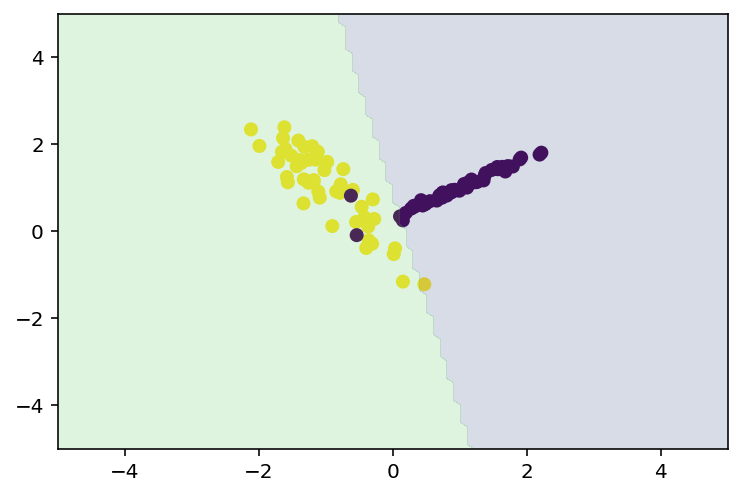

In [29]:
# number of training points
N = 100

x_train, t = make_classification(
    n_features=2, 
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    n_samples=N
)

x1, x2 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
x_test = np.array([x1, x2]).reshape(2, -1).T

feature = LinearFeature()
x_train_linear = feature.transform(x_train)
x_test_linear = feature.transform(x_test)

model = LeastSquaresClassifier()
model.fit(x_train_linear, t)
predicted = model.predict(x_test_linear)

plt.scatter(x_train[:, 0], x_train[:, 1], c=t)
plt.contourf(x1, x2, predicted.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
plt.xlim(-5, 5); plt.ylim(-5, 5)
plt.show()

The least-squares approach gives an exact closed-form solution for the discriminant function parameters. However, even as a discriminant function (making decisions directly) it suffers from some problems. We already know that least-squares solutions lack robustness to outliers, and this applies equally to classification, as depicted in the following figure. Note that the additional outlier data points produce a change in the location of the decision boundary, even though these point would be correctly classified by the original decision boundary. The sum-of-squares error function penalizes predictions that are *too correct* in that they lie a long way on the correct side of the decision boundary.

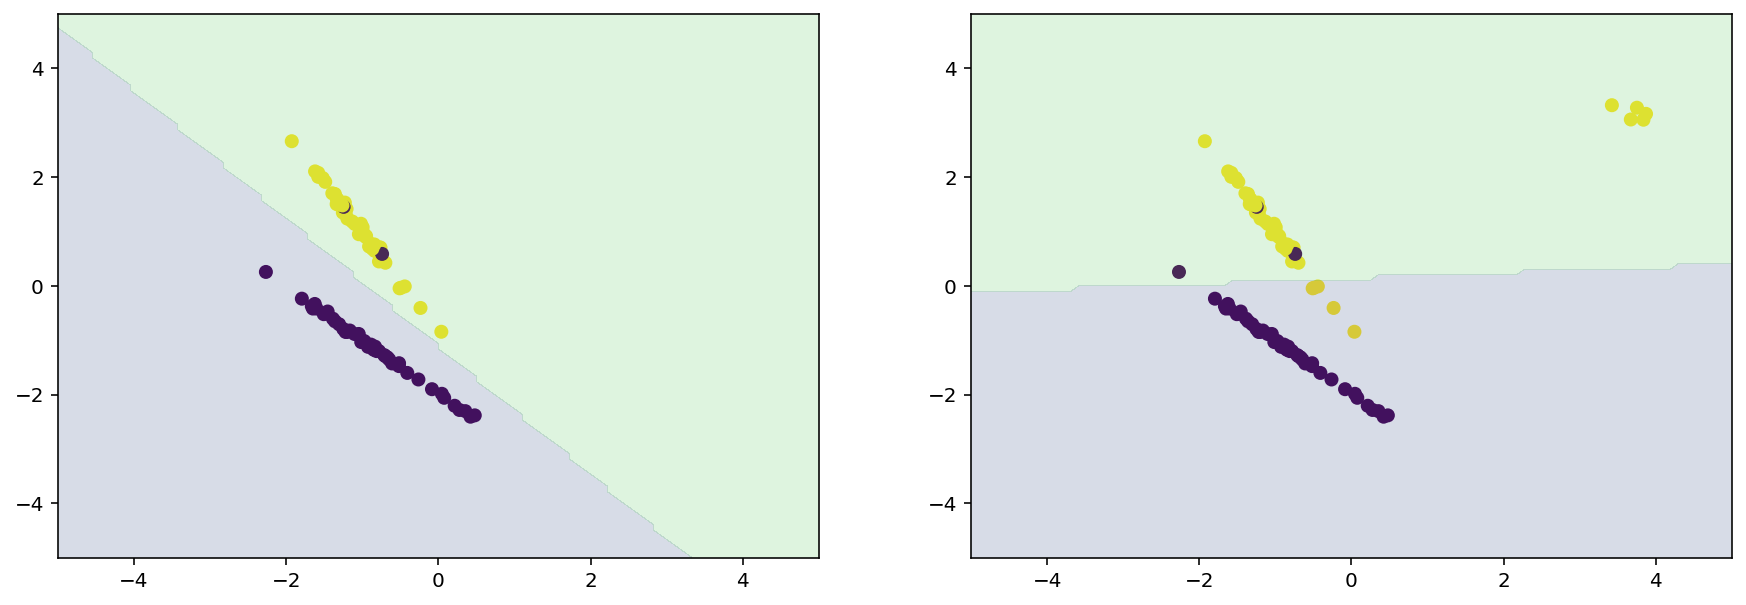

In [215]:
# number of training points
N = 100

# number of outlier points
n_outliers = 5

x_train, t = make_classification(
    n_features=2, 
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    n_samples=N,
    random_state=12
)

x1, x2 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
x_test = np.array([x1, x2]).reshape(2, -1).T

outliers = np.random.random_sample((n_outliers, 2)) + 3
x_train_outliers = np.vstack((x_train, outliers))
t_outliers = np.hstack((t, np.ones(n_outliers, dtype=int)))

feature = LinearFeature()
x_train_linear = feature.transform(x_train)
x_train_linear_outliers = feature.transform(x_train_outliers)
x_test_linear = feature.transform(x_test)

model = LeastSquaresClassifier()
model.fit(x_train_linear, t)
predicted = model.predict(x_test_linear)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(x_train[:, 0], x_train[:, 1], c=t)
plt.contourf(x1, x2, predicted.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
plt.xlim(-5, 5); plt.ylim(-5, 5)

model.fit(x_train_linear_outliers, t_outliers)
predicted_outliers = model.predict(x_test_linear)

plt.subplot(1, 2, 2)
plt.scatter(x_train_outliers[:, 0], x_train_outliers[:, 1], c=t_outliers)
plt.contourf(x1, x2, predicted_outliers.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
plt.xlim(-5, 5); plt.ylim(-5, 5)
plt.show()

The failure of least squares should not surprise us since it corresponds to maximum likelihood under the assumption of a Gaussian conditional distribution, whereas binary target vectors clearly do not have a Gaussian distribution.

### 4.1.4 Fisher's linear discriminant

### 4.1.7 The perceptron algorithm